## Indian Indices Analysis - 2024

#### Nifty 50 Analysis
- We will obtain the P/B ratio at the beginning of each year and the index returns for that year, then create a scatterplot.
- Additionally, we will include a regression line among these points.
- Furthermore, we will incorporate a vertical line to indicate the P/B value at the start of 2024.
- The horizontal line represents the potential expected return from the index for 2024. Please note that this estimation is solely based on the regression with the P/B ratio and may not be entirely accurate.

In [7]:
import numpy as np
import pandas as pd
from datetime import date
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

def prepare_data(index_file, use_pe=True, use_pb=True):
    # Read the index value file
    index_df = pd.read_csv(index_file)
    index_df["Date"] = pd.to_datetime(index_df["Date"])
    index_df["day"] = index_df["Date"].dt.day
    index_df["month"] = index_df["Date"].dt.month
    index_df["year"] = index_df["Date"].dt.year
    index_df = index_df[index_df["year"]!=2024]
    index_df = index_df.sort_values(by="Date").reset_index(drop=True)
    
    # Groupby Year
    index_group_df = index_df.groupby("year").last().reset_index()
    index_group_df["PrevClose"] = index_group_df["Close"].shift(1)
    index_group_df["Returns"] = (index_group_df["Close"] / index_group_df["PrevClose"] - 1) * 100
    index_group_df["PE"] = index_group_df["P/E"].shift(1)
    index_group_df["PB"] = index_group_df["P/B"].shift(1)

    index_group_df = index_group_df[index_group_df["PE"].notna()].reset_index(drop=True)
    index_group_df = index_group_df[index_group_df["PE"]!="-"].reset_index(drop=True)
    index_group_df = index_group_df[index_group_df["PB"]!="-"].reset_index(drop=True)
    index_group_df["PE"] = index_group_df["PE"].astype("float")
    index_group_df["PB"] = index_group_df["PB"].astype("float")
    index_group_df["Returns"] = index_group_df["Returns"].astype("float")
    return index_group_df

In [6]:
index_file = "./datasets/indices-for-2024/NIFTY 50.csv"
datasets/Indices-for-2024/NIFTY_50.csv
import os

if os.path.exists(index_file) and os.path.isdir(index_file):
    print("./datasets/indices-for-2024/NIFTY 50.csv")
else:
    print("./datasets/indices-for-2024/NIFTY 50.csv")

./datasets/indices-for-2024/NIFTY 50.csv


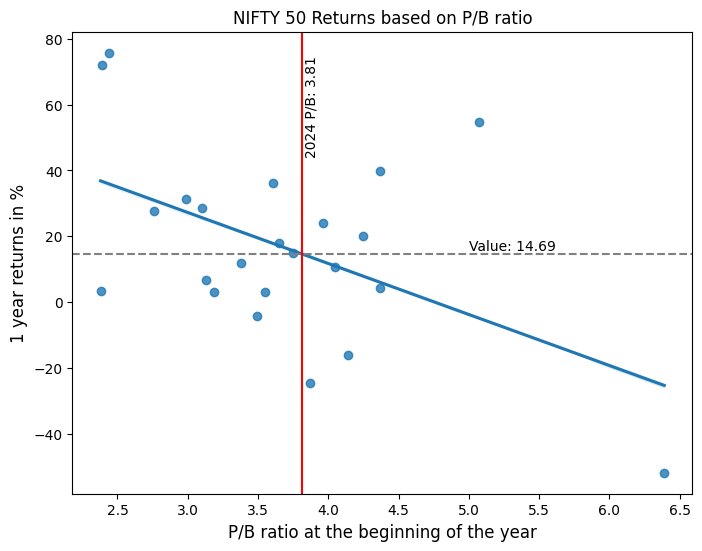

In [10]:
index_file = "datasets/Indices-for-2024/NIFTY_50.csv"
merged_df = prepare_data(index_file)

plt.figure(figsize=(8,6))
sns.regplot(
    data = merged_df,
    x = "PB",
    y = "Returns",
    ci=True
)
pb_value_2024 = float(merged_df["P/B"].values[-1])
plt.axvline(pb_value_2024, 0, color="red")
plt.text(pb_value_2024+0.02, 45, f'2024 P/B: {pb_value_2024}', rotation=90)

# Add the expected returns lines
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["PB"], merged_df["Returns"])
expected_returns = intercept + (pb_value_2024*slope)
plt.axhline(expected_returns, 0, color="grey", linestyle="--")
plt.text(5, expected_returns+1, f'Value: {round(expected_returns,2)}')

plt.xlabel('P/B ratio at the beginning of the year', fontsize=12)
plt.ylabel('1 year returns in %', fontsize=12)
plt.title("NIFTY 50 Returns based on P/B ratio")
plt.show()

### Observations:
 
- As the P/B ratio increases, one-year returns decrease, as indicated by the blue regression line.
- The potential expected return for 2024, based on the regression line, is 14.69%.

The P/B ratio and index returns are related in that a high P/B ratio generally indicates a high valuation of the stock market index, while a low P/B ratio suggests a more undervalued market. This is because the P/B ratio measures the price of a stock relative to its book value, so a high P/B ratio means investors are paying more for each unit of book value. When the P/B ratio is high, it can be a sign that the market is overvalued and may be due for a correction. On the other hand, a low P/B ratio can indicate that the market is undervalued and may be a good time to invest. However, it's important to note that the P/B ratio is just one metric and should be considered in conjunction with other factors when making investment decisions.

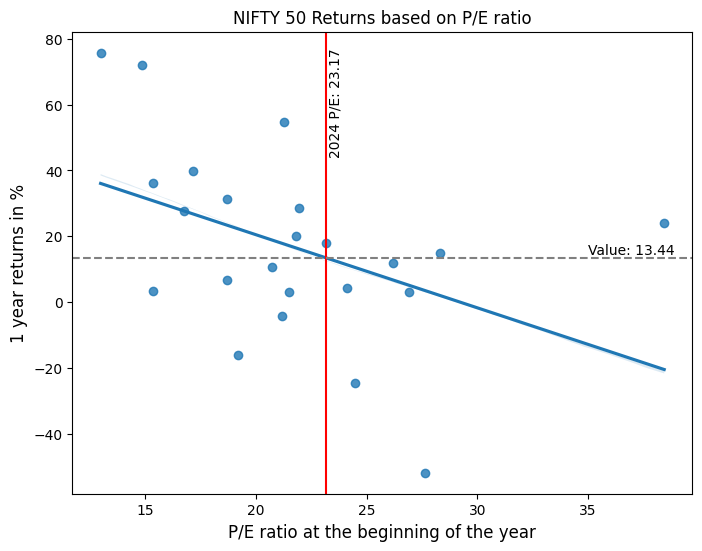

In [11]:
plt.figure(figsize=(8,6))
sns.regplot(
    data = merged_df,
    x = "PE",
    y = "Returns",
    ci=True
)
# Add a current PE line
pe_value_2024 = merged_df["P/E"].values[-1]
plt.axvline(pe_value_2024, 0, color="red")
plt.text(pe_value_2024+0.1, 45, f'2024 P/E: {pe_value_2024}', rotation=90)

# Add the expected returns lines
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["PE"], merged_df["Returns"])
expected_returns = intercept + (pe_value_2024*slope)
plt.axhline(expected_returns, 0, color="grey", linestyle="--")
plt.text(35, expected_returns+1, f'Value: {round(expected_returns,2)}')

plt.xlabel('P/E ratio at the beginning of the year', fontsize=12)
plt.ylabel('1 year returns in %', fontsize=12)
plt.title("NIFTY 50 Returns based on P/E ratio")
# plt.grid()
plt.show()

### Observations:

- As the P/E ratio increases, one-year returns decrease, as indicated by the blue regression line.
- The potential expected return for 2024, based on the regression line, is 13.44%.

The P/E ratio and index returns are related in that a high P/E ratio can indicate high expectations for future earnings growth and potentially higher index returns, while a low P/E ratio may suggest lower expectations for earnings growth and potentially lower index returns.

# Nifty Next 50 Analysis
Now we will repeat the analysis for Nifty Next 50

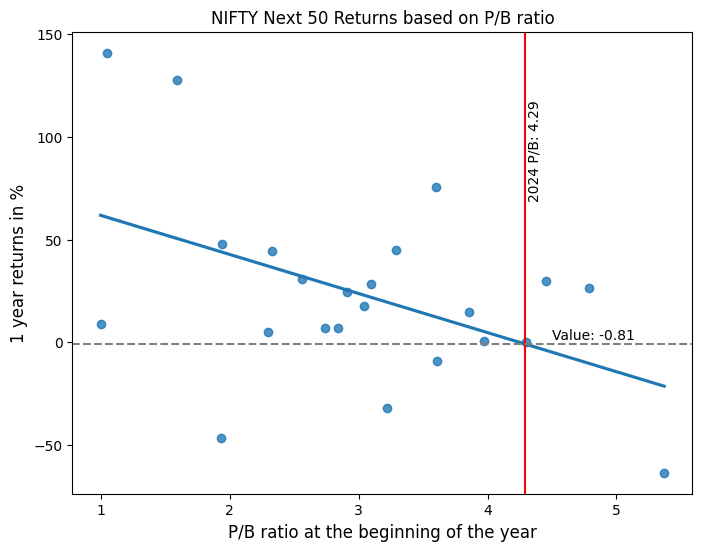

In [13]:
index_file = "./datasets/Indices-for-2024/NIFTY NEXT 50.csv"
merged_df = prepare_data(index_file)

plt.figure(figsize=(8,6))
sns.regplot(
    data = merged_df,
    x = "PB",
    y = "Returns",
    ci=True
)
pb_value_2024 = float(merged_df["P/B"].values[-1])
plt.axvline(pb_value_2024, 0, color="red")
plt.text(pb_value_2024+0.02, 70, f'2024 P/B: {pb_value_2024}', rotation=90)

# Add the expected returns lines
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["PB"], merged_df["Returns"])
expected_returns = intercept + (pb_value_2024*slope)
plt.axhline(expected_returns, 0, color="grey", linestyle="--")
plt.text(4.5, expected_returns+2, f'Value: {round(expected_returns,2)}')

plt.xlabel('P/B ratio at the beginning of the year', fontsize=12)
plt.ylabel('1 year returns in %', fontsize=12)
plt.title("NIFTY Next 50 Returns based on P/B ratio")
# plt.grid()
plt.show()

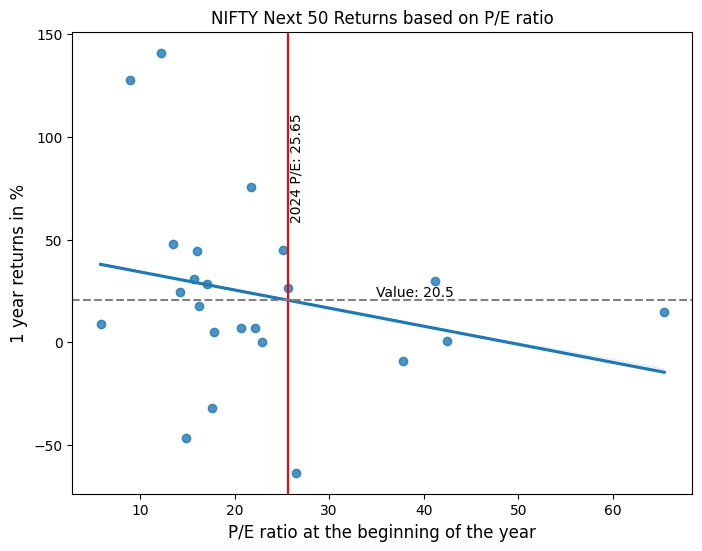

In [14]:
plt.figure(figsize=(8,6))
sns.regplot(
    data = merged_df,
    x = "PE",
    y = "Returns",
    ci=True
)
pe_value_2024 = float(merged_df["P/E"].values[-1])
plt.axvline(pe_value_2024, 0, color="red")
plt.text(pe_value_2024+0.2, 60, f'2024 P/E: {pe_value_2024}', rotation=90)

# Add the expected returns lines
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["PE"], merged_df["Returns"])
expected_returns = intercept + (pe_value_2024*slope)
plt.axhline(expected_returns, 0, color="grey", linestyle="--")
plt.text(35, expected_returns+2, f'Value: {round(expected_returns,2)}')

plt.xlabel('P/E ratio at the beginning of the year', fontsize=12)
plt.ylabel('1 year returns in %', fontsize=12)
plt.title("NIFTY Next 50 Returns based on P/E ratio")
# plt.grid()
plt.show()

## Observations:

- The potential expected return for 2024, based on the P/B regression line, is -0.81%.
- The potential expected return for 2024, based on the P/E regression line, is 20.5%.

# Nifty Midcap 150 Analysis¶


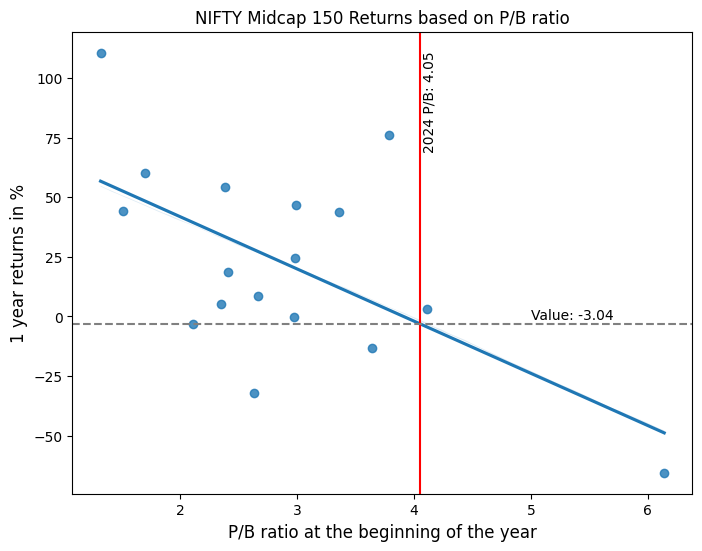

In [16]:
index_file = "./datasets/Indices-for-2024/NIFTY MIDCAP 150.csv"
merged_df = prepare_data(index_file)

plt.figure(figsize=(8,6))
sns.regplot(
    data = merged_df,
    x = "PB",
    y = "Returns",
    ci=True
)
pb_value_2024 = float(merged_df["P/B"].values[-1])
plt.axvline(pb_value_2024, 0, color="red")
plt.text(pb_value_2024+0.02, 70, f'2024 P/B: {pb_value_2024}', rotation=90)

# Add the expected returns lines
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["PB"], merged_df["Returns"])
expected_returns = intercept + (pb_value_2024*slope)
plt.axhline(expected_returns, 0, color="grey", linestyle="--")
plt.text(5, expected_returns+2, f'Value: {round(expected_returns,2)}')

plt.xlabel('P/B ratio at the beginning of the year', fontsize=12)
plt.ylabel('1 year returns in %', fontsize=12)
plt.title("NIFTY Midcap 150 Returns based on P/B ratio")
# plt.grid()
plt.show()

### Observation:

- The potential expected return for 2024, based on the P/B regression line, is -3.04%.

# Nifty Smallcap 250 Analysis


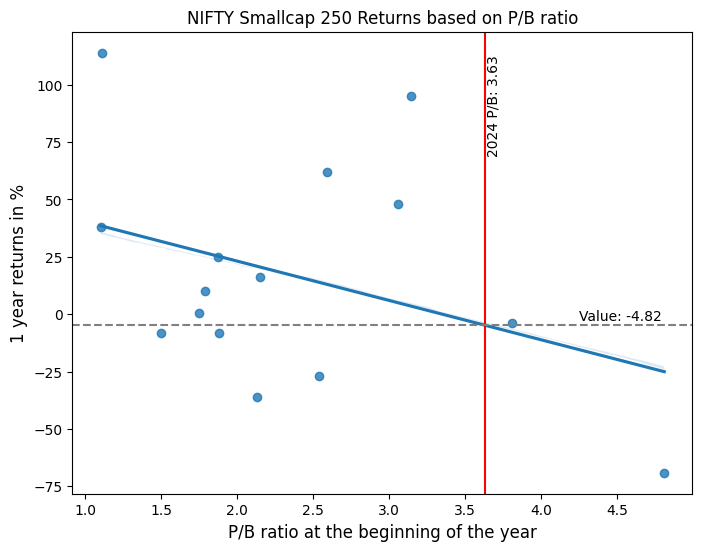

In [17]:
index_file = "./datasets/Indices-for-2024/NIFTY SMALLCAP 250.csv"
merged_df = prepare_data(index_file)

plt.figure(figsize=(8,6))
sns.regplot(
    data = merged_df,
    x = "PB",
    y = "Returns",
    ci=True
)
pb_value_2024 = float(merged_df["P/B"].values[-1])
plt.axvline(pb_value_2024, 0, color="red")
plt.text(pb_value_2024+0.01, 70, f'2024 P/B: {pb_value_2024}', rotation=90)

# Add the expected returns lines
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["PB"], merged_df["Returns"])
expected_returns = intercept + (pb_value_2024*slope)
plt.axhline(expected_returns, 0, color="grey", linestyle="--")
plt.text(4.25, expected_returns+2, f'Value: {round(expected_returns,2)}')

plt.xlabel('P/B ratio at the beginning of the year', fontsize=12)
plt.ylabel('1 year returns in %', fontsize=12)
plt.title("NIFTY Smallcap 250 Returns based on P/B ratio")
# plt.grid()
plt.show()


### Observation:
- The potential expected return for 2024, based on the P/B regression line, is -4.82%.

# Nifty Microcap 250 Analysis¶


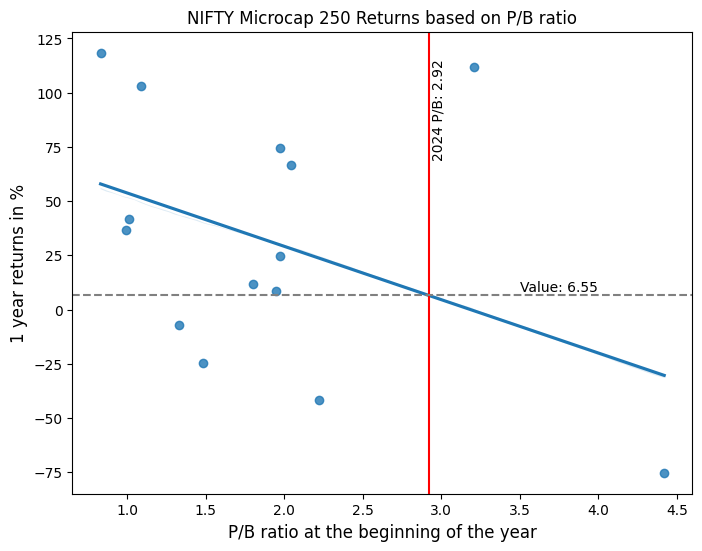

In [18]:
index_file = "./datasets/Indices-for-2024/NIFTY MICROCAP 250.csv"
merged_df = prepare_data(index_file)

plt.figure(figsize=(8,6))
sns.regplot(
    data = merged_df,
    x = "PB",
    y = "Returns",
    ci=True
)
pb_value_2024 = float(merged_df["P/B"].values[-1])
plt.axvline(pb_value_2024, 0, color="red")
plt.text(pb_value_2024+0.02, 70, f'2024 P/B: {pb_value_2024}', rotation=90)

# Add the expected returns lines
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_df["PB"], merged_df["Returns"])
expected_returns = intercept + (pb_value_2024*slope)
plt.axhline(expected_returns, 0, color="grey", linestyle="--")
plt.text(3.5, expected_returns+2, f'Value: {round(expected_returns,2)}')

plt.xlabel('P/B ratio at the beginning of the year', fontsize=12)
plt.ylabel('1 year returns in %', fontsize=12)
plt.title("NIFTY Microcap 250 Returns based on P/B ratio")
# plt.grid()
plt.show()

### Observation:
- The potential expected return fo'r 2024, based on the P/B regression line, is 6.55%.